### 목표
- iris 데이터 활용해서 붓꽃 품종을 분류해보자
- 신경망에서 다중분류 학습하는 신경망을 설계해보자

In [1]:
# 도구 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris


In [2]:
# 데이터 담기 
data = load_iris()

# 번체 객체 형태
# 키 : 값

data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
data.feature_names # 특성 4개 활용

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
data.data # 데이터 타입 : float

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
data.target # 랜덤 샘플링 작업 필요

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
data.target_names # 0 - setosa | 1 - versicolor | 2 - virginica -> class 3개

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### 훈련, 테스트 데이터 분리

In [7]:
# 8대 2로 분리 
# 고정 3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=3)

# 크기 확인
print("훈련용:", X_train.shape, y_train.shape)
print("테스트용:", X_test.shape, y_test.shape)

훈련용: (120, 4) (120,)
테스트용: (30, 4) (30,)


In [8]:
from tensorflow.keras.utils import to_categorical

y_tr_oh = to_categorical(y_train) # 훈련용 인코딩
y_te_oh = to_categorical(y_test) # 테스트용 인코딩

In [9]:
y_tr_oh

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1

#### keras 활용 인공신경망 생성
- 1. 신경망 구조 설계
- 2. 학습 / 평가 방법 설정
- 3. 학습 및 시각화
- 4. 모델 평가 및 예측

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [11]:
# 1. 신경망 뼈대 구축
model = Sequential()

# 입력층 + 증간층 1 설정

# 뉴런 16, input_dim = 입력되는 특성의 개수 만큼, 활성화 함수 = 'relu'
model.add(Dense(units=16, input_dim=4, activation = 'relu'))

# 중간층 
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='relu'))

# 출력층
# 다중 분류 : 클래스 3
model.add(Dense(units=3, activation='softmax'))

# 모델 정보 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                                 
Total params: 987
Trainable params: 987
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 2. 학습 / 평가 방법 설정

# 다중 분류
# loss = 'categorical_crossentropy'

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# 3. 학습 / 시각화
# 반복 200
# 원핫 인코딩 데이터 연결

h = model.fit(X_train, y_tr_oh, epochs = 200)

Epoch 1/200
4/4 [==============================] - 2s 7ms/step - loss: 1.2062 - accuracy: 0.0083
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 1.1107 - accuracy: 0.4000
Epoch 3/200
4/4 [==============================] - 0s 6ms/step - loss: 1.0368 - accuracy: 0.6333
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 0.9764 - accuracy: 0.6583
Epoch 5/200
4/4 [==============================] - 0s 7ms/step - loss: 0.9255 - accuracy: 0.6667
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 0.8756 - accuracy: 0.6583
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 0.8286 - accuracy: 0.6583
Epoch 8/200
4/4 [==============================] - 0s 7ms/step - loss: 0.7854 - accuracy: 0.6667
Epoch 9/200
4/4 [==============================] - 0s 7ms/step - loss: 0.7470 - accuracy: 0.6667
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 0.7093 - accuracy: 0.6750
Epoch 11/200
4/4 [===========

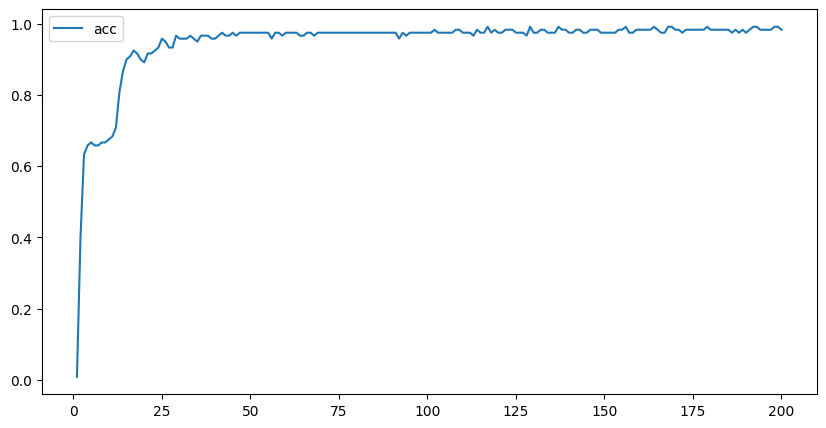

In [16]:
plt.figure(figsize=(10,5))
plt.plot(range(1,201), h.history['accuracy'],label='acc')
plt.legend()
plt.show()

In [17]:
# 평가 

model.evaluate(X_test, y_te_oh)

1/1 [==============================] - 0s 223ms/step - loss: 0.0687 - accuracy: 0.9667


[0.06872757524251938, 0.9666666388511658]